In [82]:
import pandas as pd
import matplotlib.pyplot as plt

Next, we’ll go field by field and think about how we can use each one:
- The first field, “product”, contains many different types of morsels. Soul Foods is only interested in Pink Morsels, so we can remove any row which contains another type of product.
- Next come “quantity” and “price”. Since we’re interested in the total sales for a given day, these can be combined into a single field, “sales,” by multiplying them together.
- The date field is useful as is and can remain untouched.
- It would be nice to filter by region in the final visualisation, so we’ll also leave the region field untouched.

In [96]:
def wrangle(path):
    # read file
    df = pd.read_csv(path)
    # filter a subset of the original dataset
    mask_pink_morsel = df['product'] == 'pink morsel'
    df = df[mask_pink_morsel]
    # create a new column sales
    df.price = df.price.str.replace("$", "").astype(float)
    df['sales'] = df['price'] * df['quantity']
    # drop other columns
    df.drop(columns=['price', 'quantity', 'product'], inplace=True)
    return df

In [97]:
df0 = wrangle('data/daily_sales_data_0.csv')
df1 = wrangle('data/daily_sales_data_1.csv')
df2 = wrangle('data/daily_sales_data_2.csv')

In [98]:
df = pd.concat([df0, df1, df2], axis=0).reset_index(drop=True)

In [99]:
df.head()

,date,region,sales
0,2018-02-06,north,1638.0
1,2018-02-06,south,1647.0
2,2018-02-06,east,1731.0
3,2018-02-06,west,1557.0
4,2018-02-07,north,1587.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5880 non-null   object 
 1   region  5880 non-null   object 
 2   sales   5880 non-null   float64
dtypes: float64(1), object(2)
memory usage: 137.9+ KB


In [102]:
sale_by_region = df.groupby('region').sales.sum().sort_values(ascending=False)
sale_by_region

region
north    2663876.0
west     2661639.0
south    2660340.0
east     2659728.0
Name: sales, dtype: float64

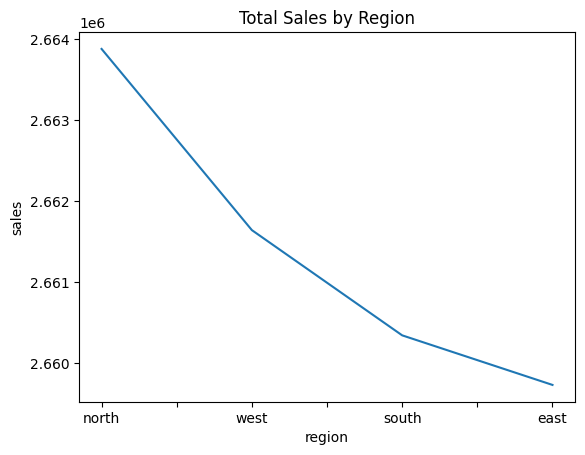

In [95]:
sale_by_region = df.groupby('region').sales.sum().sort_values(ascending=False)
sale_by_region.plot(
    kind='line',
    xlabel='region',
    ylabel='sales',
    title="Total Sales by Region"
);

In [104]:
df_clean = df.to_csv('data/data_clean.csv', index=False)